## Import Statements

In [1]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model

## Data Loading

In [2]:
#Loading the Data in a DataFrame df
df = pd.read_csv('C:/Users/karth/OneDrive/Desktop/High Radius/H2HBABBA2877.csv')
dummy_df = pd.read_csv('C:/Users/karth/OneDrive/Desktop/High Radius/H2HBABBA2877.csv')

## Dropping Duplicates & Columns

In [3]:
df = df.drop_duplicates()
df.drop(['area_business','posting_id','invoice_id'],axis=1, inplace=True) 

#Dropping column "Area Business" & "Posting ID" were constants. 
#Dropping column "invoice_ID" as "Doc_id" is already present (Invoice ID ~ Doc_id)

## Type Casting

In [4]:
df['buisness_year'] = df.buisness_year.astype(int)
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y-%m-%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y-%m-%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

## Calculating the DaysLate Column

In [5]:
df['Date_difference'] = df['clear_date'] - df['due_in_date']
df['DaysLate'] = df["Date_difference"].dt.days
df.drop(['Date_difference'],axis=1, inplace=True)

df.drop(['clear_date'],axis=1, inplace=True) #Dropping Column "Clear date" as the " DaysLate"feature was extracted from it.

In [6]:
#The Reason behind splitting it into Raw_train & Raw_test is to prevent Data leakage.

Raw_train = df[df['isOpen'] == 0] #We'll be working with this dataset for now
Raw_test = df[df['isOpen'] == 1]

# Feature Engineering & Feature Selection

### Label Encoding for Columns for type object

In [7]:
#Business_Code ---> Encoded Business_Code
BusinessCode_Enc = LabelEncoder()
label1 = BusinessCode_Enc.fit_transform(Raw_train['business_code'])
Raw_train['business_code_Enc'] = label1
Raw_train.drop('business_code', axis=1, inplace=True)

#Document Type ---> Encoded Document Type
DocType_Enc = LabelEncoder()
label3 = DocType_Enc.fit_transform(Raw_train['document type'])
Raw_train['DocType_Enc'] = label3
Raw_train.drop('document type', axis=1, inplace=True)

#Currency ---> Encoded Currency Type
Currency_Enc = LabelEncoder()
label4 = Currency_Enc.fit_transform(Raw_train['invoice_currency'])
Raw_train['Currency_Enc'] = label4
Raw_train.drop('invoice_currency', axis=1, inplace=True)

### Converting Date into Day & Month separately

In [8]:
Raw_train['posting_date_Day'] = Raw_train['posting_date'].dt.day
Raw_train['posting_date_Month'] = Raw_train['posting_date'].dt.month

Raw_train['due_in_date_Day'] = Raw_train['due_in_date'].dt.day
Raw_train['due_in_date_Month'] = Raw_train['due_in_date'].dt.month

Raw_train['document_create_date_Day'] = Raw_train['document_create_date'].dt.day
Raw_train['document_create_date_Month'] = Raw_train['document_create_date'].dt.month

Raw_train['document_create_date.1_Day'] = Raw_train['document_create_date.1'].dt.day
Raw_train['document_create_date.1_Month'] = Raw_train['document_create_date.1'].dt.month

Raw_train['baseline_create_date_Day'] = Raw_train['baseline_create_date'].dt.day
Raw_train['baseline_create_date_Month'] = Raw_train['baseline_create_date'].dt.month

Raw_train.drop(['posting_date', 'due_in_date','document_create_date','document_create_date.1',
               'baseline_create_date'],axis=1, inplace=True)


In [9]:
#Copying the Raw_train data into a sepearte Dataframe to perform Exploratory Data Analysis
Eda_data = Raw_train.copy(deep=True)

### Separating Target Column & Other Features

In [10]:
y = pd.DataFrame(Raw_train['DaysLate'])
Raw_train.drop(['doc_id','total_open_amount','isOpen','DaysLate',
               'document_create_date_Day','document_create_date.1_Day','document_create_date.1_Month'], inplace=True, axis=1)

###### For selecting the X Features for Train Test, I used Wrapper Method - Forward Selection (Manually). By Selecting these features i'm getting the Best Accuracy possible.

In [11]:
#Dropping Other features except the the above mentioned (X and y)
Raw_train.drop(['cust_number','name_customer','cust_payment_terms'],axis=1, inplace=True)

## Using Train_test_split function to further split the data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(Raw_train,y,test_size=0.25, random_state=0)

## Exploratory Data Analysis (EDA)

In [13]:
#Dividing the Open Amount column into different categories for better visualization

def numeric_to_categoric (x):
    if x <= 10000: return "Less and Equal Rs 10000"
    elif x <= 20000: return "Between (10000-20000]"
    elif x <= 40000: return "Between (20000-40000]"
    elif x <= 60000: return "Between (40000-60000]"
    else: return "Greater 60000"
Eda_data['total_open_amount'] = Eda_data['total_open_amount'].apply(numeric_to_categoric)

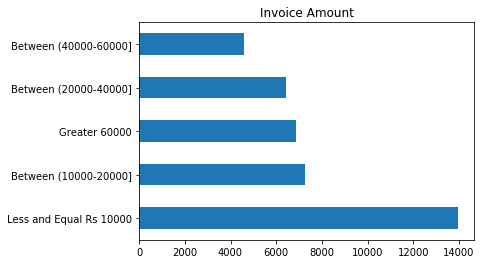

In [14]:
#Plotting the Bar Graph
Eda_data['total_open_amount'].value_counts().plot(kind='barh', title='Invoice Amount')

###### From the above graph we come to know that most of the company's pending amount is below Rs.10,000/-

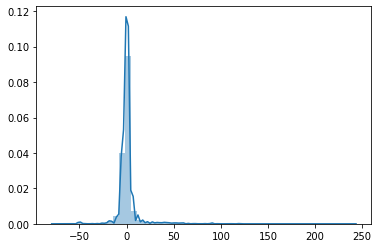

In [15]:
#Distribution Plot is plotted for DaysLate feature
sns.distplot(y)

##### From the above graph we come to a conclusion that the common Payment delay days are around 10 - 20 days

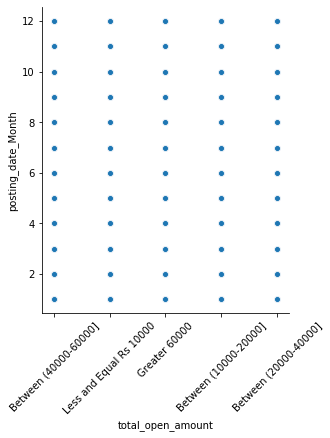

In [16]:
sns.relplot(x='total_open_amount', y="posting_date_Month", data=Eda_data);
plt.xticks(rotation=45)
plt.show()

##### The above graph gives the Pending Amounts Month wise

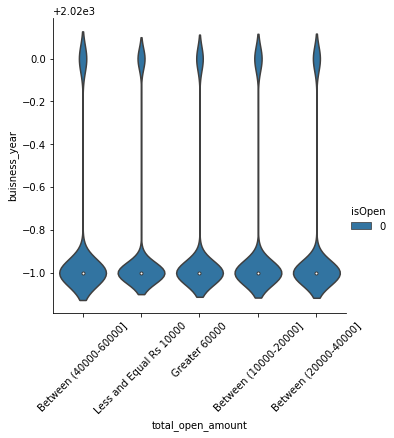

In [19]:
sns.catplot(x='total_open_amount', y='buisness_year', hue='isOpen',
            kind="violin", data=Eda_data)
plt.xticks(rotation=45)
plt.show()

# Model Testing

##### Logistic Regression

In [20]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train.values.ravel())

y_pred = logr.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#Our data was first trained and tested using Logistic Regression Model and it gave a MSE Value of 10.96

10.961192932853953

##### Linear Regression

In [21]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train.values.ravel())

y_pred = reg.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#The Data was then trained using Linear Regression and gave a MSE Value of 10.77

10.774722426273946

##### Ridge Regression

In [22]:
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train,y_train.values.ravel())
y_pred = ridgeR.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#The Data was then trained using Ridge Regression and gave a MSE Value of 10.77

10.77443387858077

##### Lasso Regression

In [23]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train.values.ravel())
y_pred1 = lasso.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#The Data was then trained using Lasso Regression and gave a MSE Value of 10.77

10.77443387858077

##### KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train.values.ravel())

y_pred = knn.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#The Data was then trained using KNeighborsClassifier and gave a MSE Value of 12.18

12.184182142373267

##### Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train.values.ravel())

y_pred = rfc.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#When trained and tested using Random Forest Classifier, the model gave a MSE Value of 11.01

11.095325016366754

##### Random Forest Regression

In [26]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train,y_train.values.ravel())

y_pred = rfr.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#When trained and tested using Random Forest Regressor, the model gave a MSE Value of 9.63

9.631454379832698

##### Decision Tree Classifier

In [27]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train.values.ravel())

y_pred = dtc.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#When trained and tested using Decision Tree Classifier, the model gave a MSE Value of 11.60

11.57456046239988

##### Decision Tree Regression

In [28]:
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train,y_train.values.ravel())

y_pred = dtr.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#When trained and tested using Decision Tree Regressor, the model gave a MSE Value of 10.99

10.996303897454526

##### Naive Bayes Model

In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

y_pred = gnb.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#When trained and tested using Naive Bayes Model, the model gave a MSE Value of 57.40 Therefore NaiveBayes doesn't suit our data.

57.40211103903968

##### XGB Regressor

In [30]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train.values.ravel())

y_pred = xg.predict(X_test)

mean_squared_error(y_test,y_pred,squared=False)

#When trained and tested using XGB Regressor, the model gave a MSE Value of 9.31

9.31342991529285

### After Comparing the results of various models, I come to a conclusion that the XGB Regressor gives better results than other Machine learning models

## Let's try it out with Raw_Test Dataset

### Making all the changes that was made to the Raw_train Dataset|

In [31]:
#Business_Code ---> Encoded Business_Code
label1 = BusinessCode_Enc.transform(Raw_test['business_code'])
Raw_test['business_code_Enc'] = label1
Raw_test.drop('business_code', axis=1, inplace=True)

#Document Type ---> Encoded Document Type
label3 = DocType_Enc.transform(Raw_test['document type'])
Raw_test['DocType_Enc'] = label3
Raw_test.drop('document type', axis=1, inplace=True)

#Currency ---> Encoded Currency Type
label4 = Currency_Enc.transform(Raw_test['invoice_currency'])
Raw_test['Currency_Enc'] = label4
Raw_test.drop('invoice_currency', axis=1, inplace=True)

In [32]:
Raw_test['posting_date_Day'] = Raw_test['posting_date'].dt.day
Raw_test['posting_date_Month'] = Raw_test['posting_date'].dt.month

Raw_test['due_in_date_Day'] = Raw_test['due_in_date'].dt.day
Raw_test['due_in_date_Month'] = Raw_test['due_in_date'].dt.month

Raw_test.drop(['posting_date', 'due_in_date'],axis=1, inplace=True)

Raw_test['document_create_date'] = pd.to_datetime(Raw_test['document_create_date'], format='%Y%m%d')
Raw_test['document_create_date.1'] = pd.to_datetime(Raw_test['document_create_date.1'], format='%Y%m%d')

Raw_test['document_create_date_Day'] = Raw_test['document_create_date'].dt.day
Raw_test['document_create_date_Month'] = Raw_test['document_create_date'].dt.month

Raw_test['document_create_date.1_Day'] = Raw_test['document_create_date.1'].dt.day
Raw_test['document_create_date.1_Month'] = Raw_test['document_create_date.1'].dt.month

Raw_test.drop(['document_create_date', 'document_create_date.1'],axis=1, inplace=True)
Raw_test['baseline_create_date'] = pd.to_datetime(Raw_test['baseline_create_date'], format='%Y%m%d')

Raw_test['baseline_create_date_Day'] = Raw_test['baseline_create_date'].dt.day
Raw_test['baseline_create_date_Month'] = Raw_test['baseline_create_date'].dt.month

Raw_test.drop(['baseline_create_date'],axis=1, inplace=True)

In [33]:
Raw_test.drop(['doc_id','total_open_amount','document_create_date_Day',
               'document_create_date.1_Day','document_create_date.1_Month',
              'cust_number','name_customer','cust_payment_terms','isOpen','DaysLate'], inplace=True, axis=1)

### Predicting for the Test Data

In [34]:
y_pred = xg.predict(Raw_test)
Raw_test['Predicted DaysLate'] = y_pred.tolist()

### Bucketing the Delay column into 3 categories

In [35]:
def Buckets (x):
    if x <= 10: return "Less and Equal 10"
    elif x <= 20: return "Between 10-20"
    else: return "More than 20"
Raw_test['Delay Buckets'] = Raw_test['Predicted DaysLate'].apply(Buckets)

In [36]:
Raw_test['Predicted DaysLate']= Raw_test['Predicted DaysLate'].round()

### Calculating the Predicted Payment Date

In [37]:
Raw_test['Predicted Payment Date'] = dummy_df['due_in_date'] + Raw_test['Predicted DaysLate']

# Final Output

In [38]:
Raw_test.head()

,buisness_year,business_code_Enc,DocType_Enc,Currency_Enc,posting_date_Day,posting_date_Month,due_in_date_Day,due_in_date_Month,document_create_date_Month,baseline_create_date_Day,baseline_create_date_Month,Predicted DaysLate,Delay Buckets,Predicted Payment Date
2,2020,1,0,1,29,3,13,4,3,29,3,-4.0,Less and Equal 10,20200409.0
3,2020,1,0,1,17,3,1,4,3,17,3,-0.0,Less and Equal 10,20200401.0
7,2020,1,0,1,27,3,11,4,3,27,3,-1.0,Less and Equal 10,20200410.0
12,2020,1,0,1,25,4,10,5,4,25,4,-3.0,Less and Equal 10,20200507.0
18,2020,1,0,1,11,4,26,4,4,11,4,-6.0,Less and Equal 10,20200420.0
